# Slovenian dataset

In [1]:
# Allow reloading of libraries without restarting the kernel
%load_ext autoreload
%autoreload 2

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from lynx_id.data.dataset import LynxDataset

from pathlib import Path

## Load dataset and retrieve csv

In [3]:
DATASET = Path("/gpfsscratch/rech/ads/commun/datasets/extracted/")

In [9]:
dataset = LynxDataset(
    dataset_csv=DATASET / "lynx_dataset_full.csv",
    countries=['Slovenia'],
    mode='single',
    device='auto',
    verbose=False,
)

In [11]:
df_slovenia = dataset.dataframe

In [13]:
print(f"In the dataset, we have {len(df_slovenia)} images of Slovenian lynx.")

In the dataset, we have 1955 images of Slovenian lynx.


In [16]:
df_slovenia.describe()

,image_number,conf,x,y,width,height,number_animals,number_children,latitude,longitude
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.00000,1955.000000,0.0,0.0,1955.000000,1955.000000
mean,90.342199,0.930042,1522.254698,1129.712152,895.71064,738.959739,NaN,NaN,45.734573,14.654804
std,109.026482,0.064229,1287.219559,487.494171,581.63248,499.739520,NaN,NaN,0.198655,0.265035
min,1.000000,0.500000,0.000000,0.000000,47.98464,70.992000,NaN,NaN,45.489285,13.957060
25%,17.000000,0.924000,569.372800,732.456000,461.31200,394.400000,NaN,NaN,45.612510,14.525810
50%,48.000000,0.950000,1275.904000,1046.728800,783.71200,626.925600,NaN,NaN,45.716600,14.734900
75%,110.000000,0.966000,2152.550400,1520.920800,1203.29440,907.841600,NaN,NaN,45.761366,14.787635
max,463.000000,0.985000,6396.633600,2996.633600,5152.00000,3834.675200,NaN,NaN,46.437879,15.129800


## Columns without NaN

In [18]:
df_slovenia.dropna(axis=1, how='all').columns

Index(['filepath', 'lynx_id', 'date', 'location', 'image_number', 'conf', 'x',
       'y', 'width', 'height', 'sex', 'latitude', 'longitude', 'country',
       'filepath_no_bg'],
      dtype='object')

## Sex

In [17]:
df_slovenia['sex'].value_counts()

sex
Male      1342
Female     557
Name: count, dtype: int64

## Location

In [25]:
location_value_counts = df_slovenia['location'].value_counts()

print(f"There are {len(location_value_counts)} unique locations.")
location_value_counts

There are 39 unique locations.


location
LD_Struge                    334
LD_Ribnica                   217
LD_Babno_polje               154
LPN_Jelen                    151
LPN_Sneznik_Kocevska_Reka    137
LD_Loka_pri_Crnomlju         114
LD_Kocevje                   110
LD_Osilnica                   96
LD_Bled                       90
LD_Loz_Stari_trg              81
LD_Loski_Potok                71
LD_Velike_Poljane             60
LPN_Triglav                   52
LD_Draga                      47
LPN_Medved                    39
LD_Iga_vas                    36
LD_Predgrad                   30
LPN_Ljubljanski_vrh           24
LD_Stari_trg                  21
LD_Col                        20
LD_Mokrc                      16
LD_Suha_Krajina               10
LPN_Zitna_gora                 9
LD_Rakek                       9
LD_Dolenja_vas                 6
LD_Banja_Loka                  5
LD_Jelovica                    3
LD_Bohinjska_Bistrica          2
LD_Bukovje                     1
LD_Crnomelj                    1
L

## Number of images per individuals

In [23]:
nb_images_per_individuals = df_slovenia["lynx_id"].value_counts()

print(f"{len(nb_images_per_individuals)} unique individuals")
nb_images_per_individuals

52 unique individuals


lynx_id
Goru                463
Draga2              199
Osilnica2           153
Teja(MalaGora1)     111
PoljanskaGora1      105
MalaGora2           104
Tris                 99
Zdrocle1             83
Grajsevka1           67
Kambrce2             59
Kambrce1             59
Rog1                 44
Draga1               43
RacnaGora1           43
Osilnica1            42
Lenka                30
Rakek1               26
Pesjanka1            21
Glazuta2016          20
Stojna3              18
Nanos1               15
Pogorelec2           15
Predgrad1            14
Julija               11
Mokrc2               11
Ribnica1             10
Mala                  8
Menisija1             8
Hrusica1              7
Pogorelec1            7
Zdrocle2              6
Niko                  6
MiÅ¡o (Jurjeva3)      6
Stojna1               6
Mokrc1                5
Zois                  4
Gomance2              4
Javorje2              4
Javorniki2            3
Koce1                 2
Jelovica1             2
Gomance1

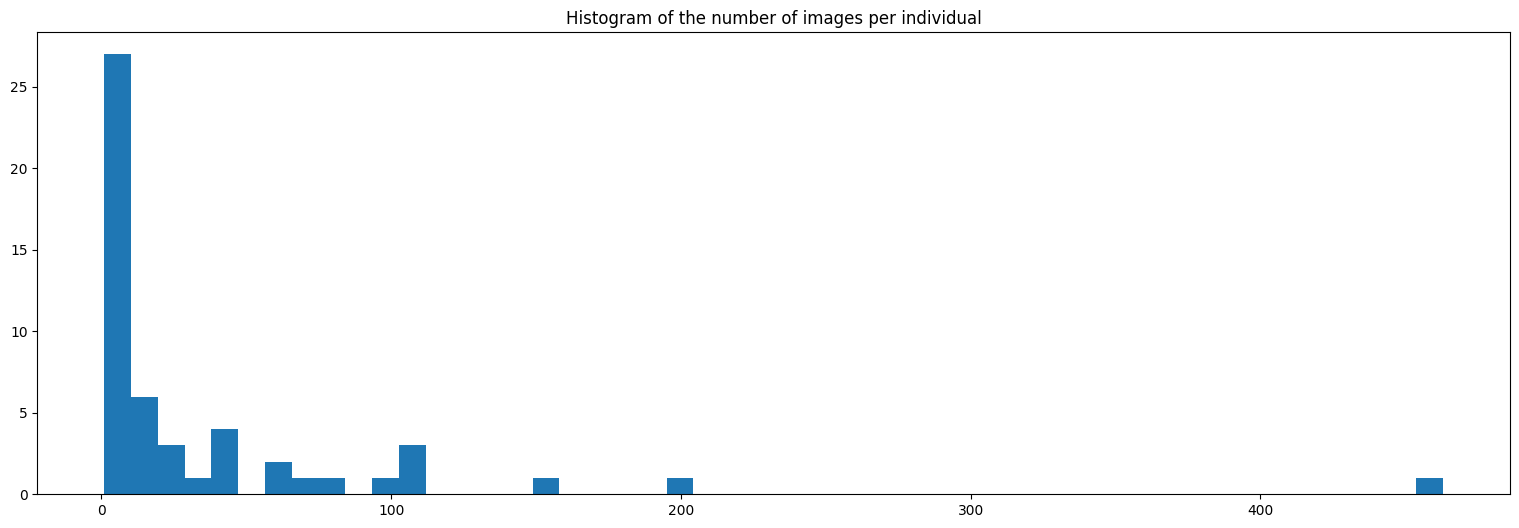

In [34]:
plt.figure(figsize=(19, 6))
plt.hist(nb_images_per_individuals, bins=50)
plt.title("Histogram of the number of images per individual")
plt.show()

In [37]:
print(f"On average, there are {np.mean(nb_images_per_individuals)} images per individual")

On average, there are 37.59615384615385 images per individual


In [38]:
print(f"{len(nb_images_per_individuals[nb_images_per_individuals < 3])} individuals have less than 3 images")

13 individuals have less than 3 images


## Date

In [40]:
oldest_date = df_slovenia["date"].min()
latest_date = df_slovenia["date"].max()

print(f"Oldest date: {oldest_date}")
print(f"Latest date: {latest_date}")

Oldest date: 2018-08-19 01:11:00
Latest date: 2023-05-06 18:04:00


Text(0.5, 1.0, 'Date distribution')

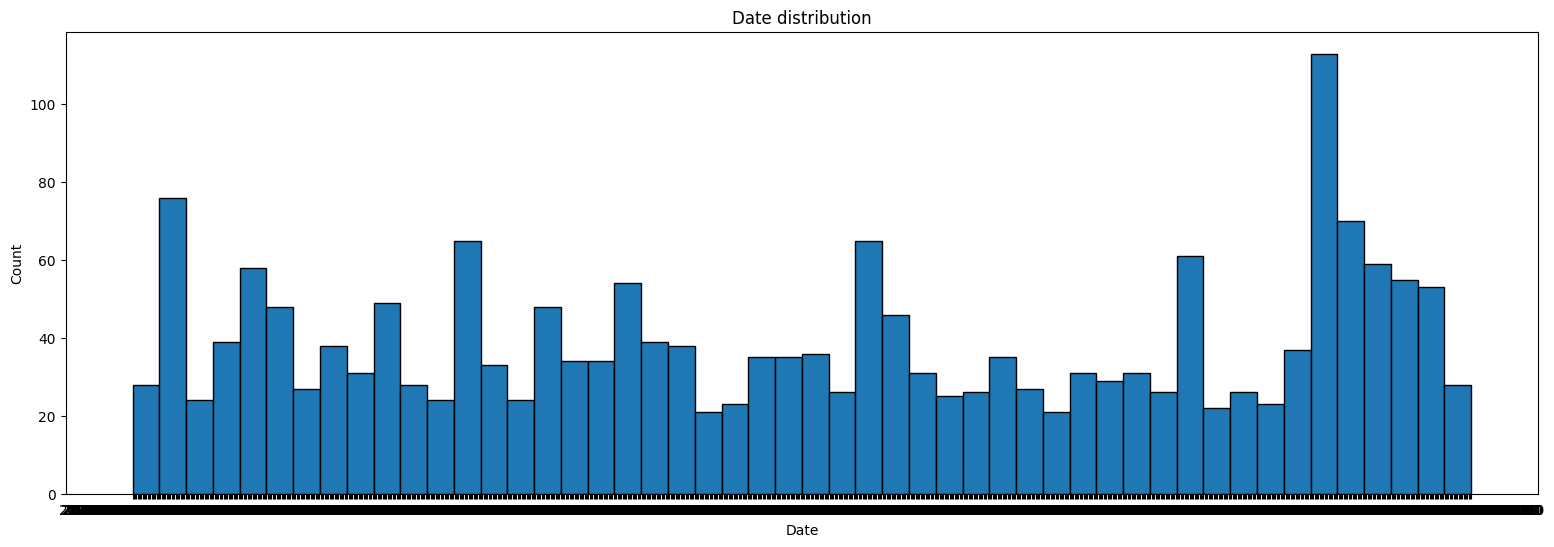

In [44]:
plt.figure(figsize=(19, 6))
plt.hist(df_slovenia["date"], bins=50, edgecolor="black")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Date distribution")

## Image
### Image dimensions

In [46]:
heights = []
widths = []

for i, image_i in enumerate(dataset):
    print(i, end="\r")
    try:
        heights.append(image_i[0]['image'].shape[0])
        widths.append(image_i[0]['image'].shape[1])
    except:
        print(i, df.iloc[i]['filepath'])
        continue

In [47]:
average_width = sum(widths)/len(widths)
average_height = sum(heights)/len(heights)

print('Average width: {} and height: {}'.format(average_width, average_height))

Average width: 1868.0455242966752 and height: 1351.344757033248


### Distribution of image dimensions

Text(0.5, 1.0, 'Plot of image dimensions')

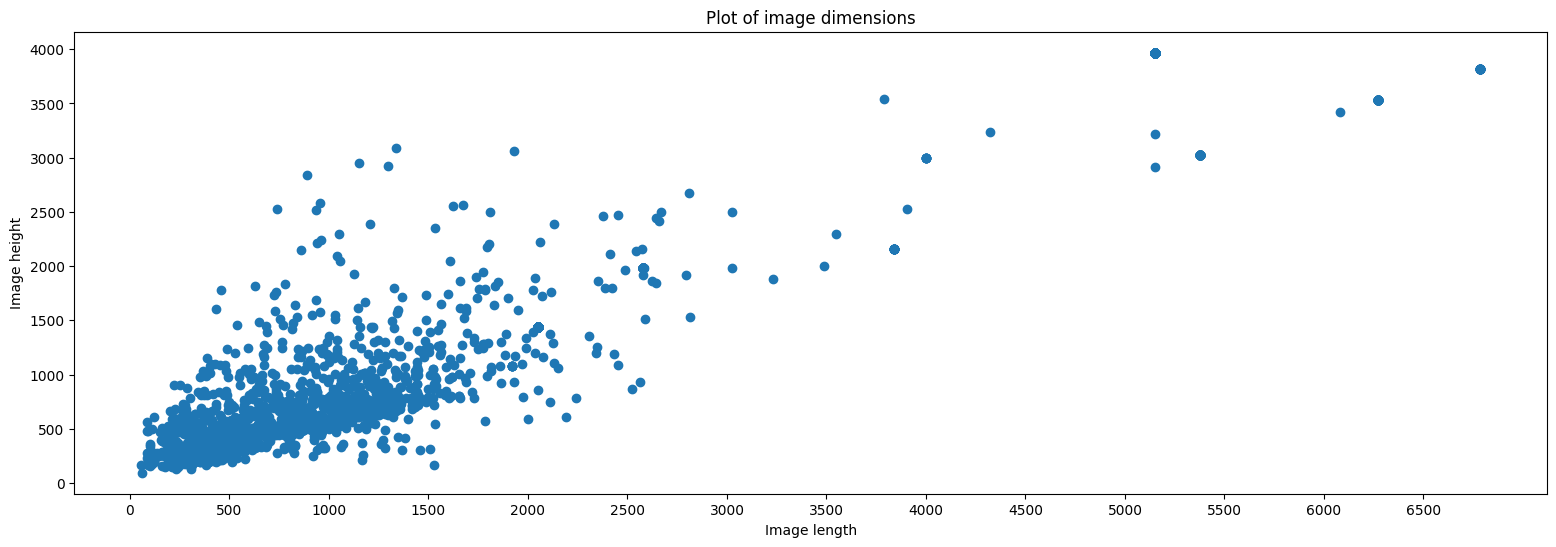

In [48]:
plt.figure(figsize=(19, 6))
plt.scatter(widths, heights)
x_tick_interval = 500
tick_positions = np.arange(0, max(widths), x_tick_interval)
plt.xticks(tick_positions)
plt.xlabel('Image length')
plt.ylabel('Image height')
plt.title('Plot of image dimensions')

In [49]:
print(f"Lowest height : {min(heights)}")
print(f"Highest height : {max(heights)}")

print(f"Lowest width : {min(widths)}")
print(f"Highest widths : {max(widths)}")

Lowest height : 95
Highest height : 3968
Lowest width : 57
Highest widths : 6784


In [50]:
dimensions = list(zip(widths, heights))
smallest_dimension = min(dimensions, key=lambda x: x[0] + x[1])
print(f"Smallest image dimension: {smallest_dimension}")

highest_dimension = max(dimensions, key=lambda x: x[0] + x[1])
print(f"Highest image dimension: {highest_dimension}")

Smallest image dimension: (61, 95)
Highest image dimension: (6784, 3816)


### Width and height distribution

Text(0.5, 1.0, 'Image height')

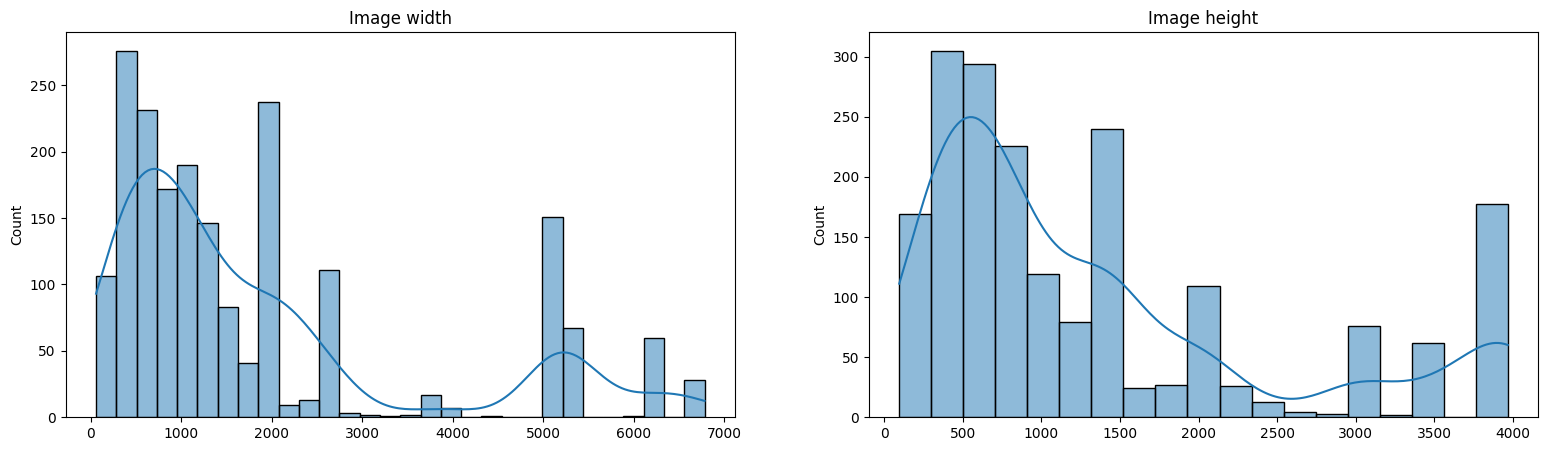

In [51]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(19, 5))

sns.histplot(widths, kde=True, ax=axes[0])
axes[0].set_title("Image width")
sns.histplot(heights, kde=True, ax=axes[1])
axes[1].set_title("Image height")

### Ratio distribution

In [52]:
ratios = []
for height, width in zip(heights, widths):
    ratios.append(width/height)
        
print(f"Mean ratio: {np.mean(ratios)}")

Mean ratio: 1.374565396018269


Text(0.5, 1.0, 'Ratio distribution')

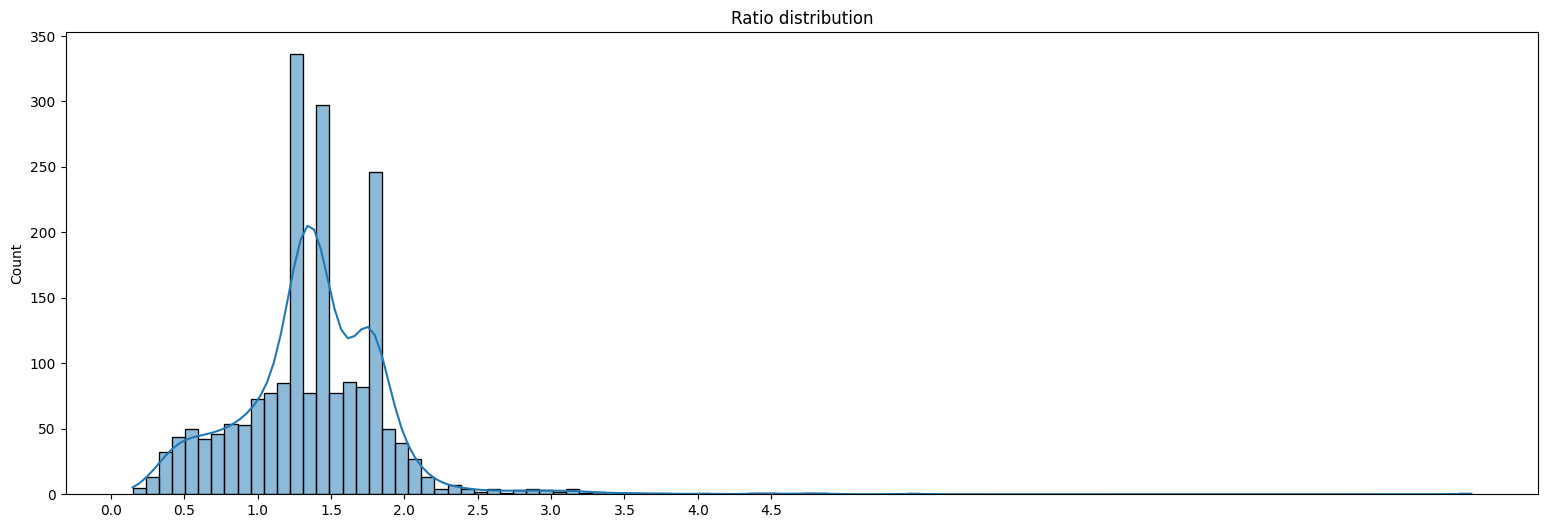

In [68]:
plt.figure(figsize=(19, 6))
sns.histplot(ratios, kde=True)
plt.xticks(np.arange(0, 5, 0.5))
plt.title("Ratio distribution")

### Image color (coloured or black and white image)

In [54]:
def is_black_and_white(img, threshold=10, show_score=False):
    diff_rg = np.abs(img[:, :, 0] - img[:, :, 1])
    diff_gb = np.abs(img[:, :, 1] - img[:, :, 2])
    diff_rb = np.abs(img[:, :, 0] - img[:, :, 2])
    
    avg_diff = (diff_rg + diff_gb + diff_rb) / 3
    
    if show_score:
        print(np.mean(avg_diff))
    
    is_bw = np.mean(avg_diff) < threshold
    
    return is_bw

0.039978428917302855


True

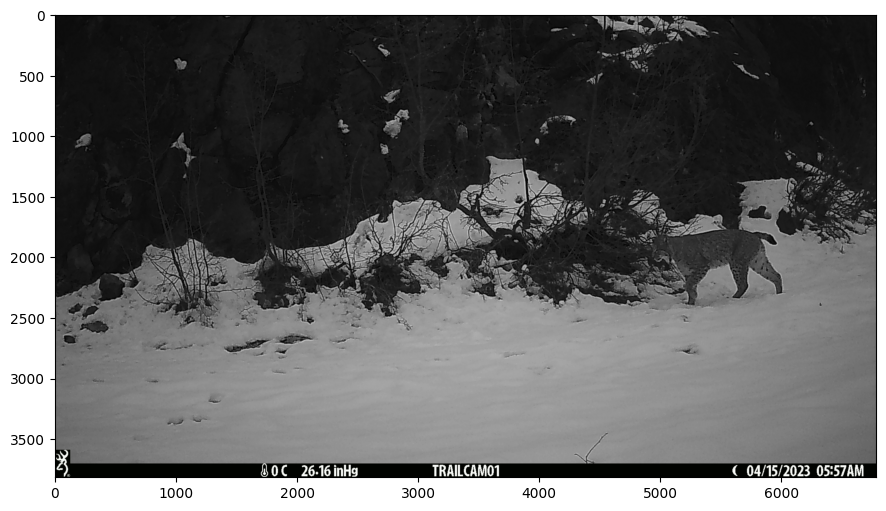

In [55]:
img = dataset[34][0]['image']
plt.figure(figsize=(19, 6))
plt.imshow(img)

is_black_and_white(img, threshold=10, show_score=True)

In [56]:
is_coloured = []

for i, image_i in enumerate(dataset):
    print(i, end="\r")
    try:
        if is_black_and_white(image_i[0]['image']):
            is_coloured.append(False)
        else:
            is_coloured.append(True)
    except:
        print(f"Problem with image {i}")
        continue

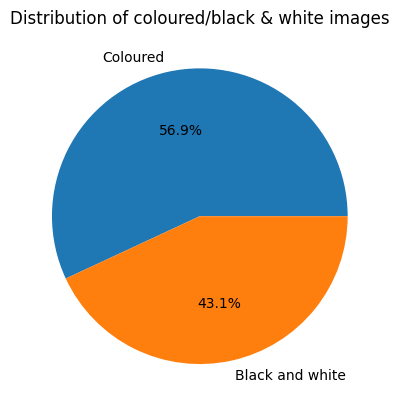

In [57]:
nb_coloured = is_coloured.count(True)
nb_bw = is_coloured.count(False)

plt.pie([nb_coloured, nb_bw], labels=['Coloured', 'Black and white'], autopct='%1.1f%%')
plt.title('Distribution of coloured/black & white images')
plt.show()